# Computer Vision

_The first part of this notebook was based on CS50's [Filter problem set](https://cs50.harvard.edu/college/2019/fall/psets/4/filter/less/)._

## Convolutional Neural Networks

In previous weeks, you have implemented a Neural Network that can classify handwritten digits. You might have done some extra research on machine learning and image recognition. If you have done so, you will probably have come across the term Convolutional Neural Net, or in short CNN. CNN's are Neural Networks that specialize in image object recognition and identification. There is multiple tasks that a CNN could be able to solve, but we will focus purely on image object classification. 

Neural Networks work under the assumption that each of the inputs into the network is independant. However, we know that in visual imagery, pixels that are at the upper left corner of an image often do not have much to do with pixels in the lower right corner. This is problem specific information that we can use to create a better model.

As often is the case in Computer Science, the solution is found in replicating nature. Scientists Hubel and Wiesel showed in the 1950s and 1960s that cat and monkey visual cortexes contain neurons that only respond to small regions in the visual field. This region of the visual field in which visual stimuli affect the firing of a single neuron is known as its receptive field. Neighbouring neurons have similar and overlapping receptive fields. In 1968, Hubel and Wiesel published a paper identifying two basic types of visual neurons; simple cells, whose output is maximized by straight lines having a particular angle in their receptive field, and complex cells, which have larger receptive fields whose outputs depend on the outputs of the simple cells within its receptive field. 

![dog](dog.jpg)

So how does the brain "classify" the images above as "dog on a leash"? On a small scale, one thing that might happen is that we recognize the sharp transition between the green of the background and the brown and white of the dog. These transitions form lines and the combination of these lines at certain angles can be interpreted as distinctive features of the dog, such as the ears or the nose.

This knowledge was used by Kunihiko Fukushima in 1980 where it inspired him to introduce the two basic types of layers that are still used in modern day convolutional networks: convolutional layers, and downsampling layers. Where convolutional layers have the role of the simple cells, having a maximized output by edges having a specific shape and orientation, whereas downsampling layers (also called pooling layers) have the role of the complex cells, whose output is for example an average of all pixels that are inside its receptive field. We will discuss and practice convolution and downsampling before continuing with the implementation of a CNN.

## Filters

As mentioned previously, we need "simple cells" that are able to determine whether a group of pixels maps to other (hidden) values. To do this, we will implement a filter. Filters are used in many applications, and you might know of blurring filters or the "sepia" filter on your phone, but they can also be used to find sharp transitions - "edges" - in images. First, we will refresh ourselves with some knowledge on images.

A 24-bit BMP uses 8 bits to signify the amount of red in a pixel’s color, 8 bits to signify the amount of green in a pixel’s color, and 8 bits to signify the amount of blue in a pixel’s color. If you’ve ever heard of RGB color, well, there you have it: red, green, blue.

If you are unfamiliar with the hexadecimal number system, [now is the time to brush up](https://www.tutorialspoint.com/hexadecimal-number-system)!

If the R, G, and B values of some pixel in a BMP are, say, 0xff, 0x00, and 0x00 in hexadecimal, that pixel is purely red, as 0xff (otherwise known as 255 in decimal) implies “a lot of red,” while 0x00 and 0x00 imply “no green” and “no blue,” respectively. A 24-bit BMP would store this bitmap as follows, where 0x0000ff signifies red and 0xffffff signifies white; we’ve highlighted in red all instances of 0x0000ff. 

![](red_smile.png)

In our code, we will quickly tranform these integer values into floats from 0 to 1, where 0 for a colour represents  no colour, and 1 indicates a maximum amount of a colour.

### Sepia

Most image editing programs support a “sepia” filter, which gives images an old-timey feel by making the whole image look a bit reddish-brown.An image can be converted to sepia by taking each pixel, and computing new red, green, and blue values based on the original values of the three.

There are a number of algorithms for converting an image to sepia, but for this problem, we’ll ask you to use the following algorithm. For each pixel, the sepia color values should be calculated based on the original color values per the below:

```
sepiaRed = .393 * originalRed + .769 * originalGreen + .189 * originalBlue
sepiaGreen = .349 * originalRed + .686 * originalGreen + .168 * originalBlue
sepiaBlue = .272 * originalRed + .534 * originalGreen + .131 * originalBlue
```

It is possible that the result of the formula is a number greater than 1, which is the maximum value for our colour values. In that case, the red, green, and blue values should be capped at 1.

**NOTE:** You might notice the line `image = image[:,:,::-1] / 255`, here we convert BGR to RGB as `cv2` automatically reads an image in BGR format, while matplotlib expects RGB. We also make sure that we are working with floats from 0 to 1 in stead of with integers from 0 to 255.

**HINT:** If the structure of the image is not entirely clear to you, try using `'red_smiley.png'` first! This is the image of the example we used above.

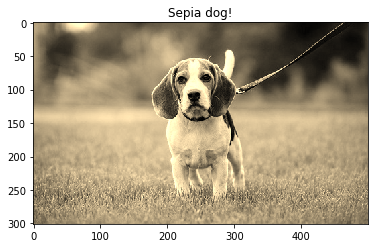

In [17]:
def sepia(image):
    sepia_image = np.zeros(image.shape)
    
    ### YOUR SOLUTION HERE
                
    return sepia_image

# Read image and transform from BGR to RGB
image = cv2.imread('dog.jpg')
image = image[:,:,::-1] / 255

plt.imshow(image)
plt.title('Dog in colour')
plt.show()

sepia_image = sepia(image)

plt.imshow(sepia_image)
plt.title("Sepia dog!")
plt.show()

### Grayscale

Below, implement a `grayscale` filter. We've already imported the image and provided you with a method of displaying the image. Recall that if the red, green, and blue values are all set to 0x00 (hexadecimal for 0), then the pixel is black. And if all values are set to 0xff (hexadecimal for 255), then the pixel is white. As long as the red, green, and blue values are all equal, the result will be varying shades of gray along the black-white spectrum, with higher values meaning lighter shades (closer to white) and lower values meaning darker shades (closer to black). In fact, we can simply give one value for all pixels, as it is the same for all three anyway!

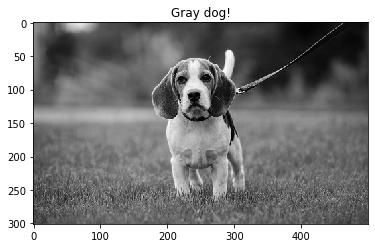

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def grayscale(image):
    gray_image = np.zeros((image.shape[0], image.shape[1]))
    
    ### YOUR SOLUTION HERE
                
    return gray_image

gray_image = grayscale(image)

plt.imshow(gray_image)
plt.title("Grayscale dog!")
plt.show()

# Note that if we want to actually show the picture in grayscale, 
# we have to tell Matplotlib to treat it this way, as it will automatically use it's yellow and blue colormap
plt.imshow(gray_image, cmap="gray")
plt.title("Gray dog!")
plt.show()

### Blur

There are a number of ways to create the effect of blurring or softening an image. For this problem, we’ll use the “box blur,” which works by taking each pixel and, for each color value, giving it a new value by averaging the color values of neighboring pixels. Consider the following grid of pixels, where we’ve numbered each pixel.

![](grid.png)

The new value of each pixel would be the average of the values of all of the pixels that are within 1 row and column of the original pixel (forming a 3x3 box, or "patch"). For example, each of the color values for pixel 6 would be obtained by averaging the original color values of pixels 1, 2, 3, 5, 6, 7, 9, 10, and 11 (note that pixel 6 itself is included in the average). Likewise, the color values for pixel 11 would be be obtained by averaging the color values of pixels 6, 7, 8, 10, 11, 12, 14, 15 and 16. The name of this box, or receptive field, is a **kernel**. The name for an area of an image that we apply this kernel to, is a **patch**.

For a pixel along the edge or corner, like pixel 16, we have a problem that requires to be solved. Since there is no value for the pixels that are to the right or to the bottom of pixel sixteen, we can not calculate an average. There's many solutions to this problem, some of which are:
- Use padding: adding pixels to the border with a specific value like zero
- Wrap: use pixels from the opposite side of the image
- Mirror: the image is conceptually mirrored at the edges. For example, attempting to read a pixel 3 units outside an edge reads one 3 units inside the edge instead
- Crop: Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been *cropped*
- Kernel crop: not using the outcome of these pixels, and adjusting the kernel where necessary

Implement the function `blur` that blurs a **gray** image taking the average of a set of pixels within the area of the given kernel size. Use either the padding or cropping method described above to solve the edge problem. _You do not have to make your code able to work for anything other than gray images._

**NOTE:** It might be difficult to see the blurring effect on the dog when using it on a small group of pixels. Try the smiley or use a bigger kernel (i.e. 11x11) to see the effects more easily.

**HINT:** use [slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) and `np.mean`! If you give `np.mean` the set of pixels it makes averaging at different sizes easier!

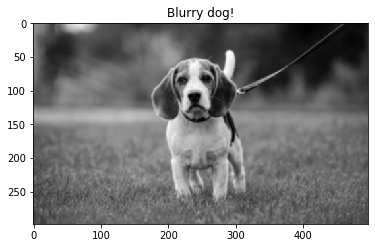

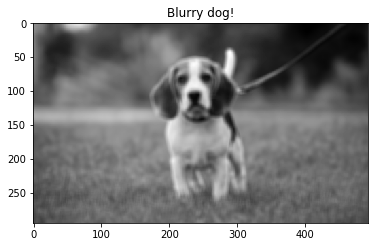

In [21]:
def blur(image, size=3):
    ### YOUR SOLUTION HERE


blur_image = blur(gray_image)

plt.imshow(blur_image, cmap="gray")
plt.title("Blurry dog!")
plt.show()

blur_image = blur(gray_image, size=7)

plt.imshow(blur_image, cmap="gray")
plt.title("Very blurry dog!")
plt.show()

## Convolution

Convolution is the process of adding each element of a matrix to its neighbours as defined by and weighted by a kernel. Lets take a look at how convolution would work for a single pixel in an image with 9 pixels numbered 1 to 9:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

In linear algebra, convolution is often depicted by using a $*$. If we convolute a kernel that is three-by-three (represented by a matrix filled with a to i) with the pixel numbered 5 (located at the coordinate [2,2]) in our example above, it would look something like this:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
*
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{bmatrix}
= 
(a \cdot 1)+(b \cdot 2)+(c \cdot 3)+(d \cdot 4)+(e \cdot 5)+(f \cdot 6)+(g \cdot 7)+(h \cdot 8)+(i \cdot 9).
$$

The general form for matrix convolution is:

$$
\begin{bmatrix}                                                                  
  x_{11}       & x_{12} & \cdots  & x_{1n} \\                                    
  x_{21}       & x_{22} & \cdots  & x_{2n} \\                                    
  \vdots       & \vdots & \ddots  & \vdots \\                                    
  x_{m1}       & x_{m2} & \cdots  & x_{mn} \\                                    
\end{bmatrix}                                      
*
\begin{bmatrix}                                                                  
  h_{11}       & h_{12} & \cdots  & h_{1n} \\                                    
  h_{21}       & h_{22} & \cdots  & h_{2n} \\                                    
  \vdots       & \vdots & \ddots  & \vdots \\                                    
  h_{m1}       & h_{m2} & \cdots  & h_{mn} \\                                    
\end{bmatrix}                                                                       
= \sum^{m-1}_{i=1} \sum^{n-1}_{j=1}                                              
   x_{ij} h_{ij}
$$

Where $m$ and $n$ are the width and height of the kernel $h$ and an image patch $x$ of same size. 

**Sidenote:** A formal definition for convolution would be that it is the transformations of two functions, where one function is transformed by the other. Or in our case, applied to two matrices, convolution is the process of flipping both the rows and columns of the kernel, multiplying corresponding entries and summing. Officially, _not flipping_ the rows and columns of the kernel would result in getting the **cross-correlation**. In practice, nearly all convolutions are implemented as cross-correlation, just because it computes faster, is simpler to understand, and we could also just flip the kernel beforehand. As all kernels we will implement in this notebook are symmetrical, we spared you the effort, and gave you the formula for cross-correlation.

Unknowingly, you have already implemented your first convolution method! Blurring an image can be done by creating a kernel that has an equal weight for all pixels in the receptive area. The weights are then normalized, such that the total is 1 and the resulting value for a convolution can never exceed the maximum value for a pixel. For a blurring kernel with size 3 it would look like this:

$$
h=
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

Implement a function `convolution` that takes two matrices of the same size and applies a convolution. The result of the function should be a single float. Note that the matrix example above is one-indexed, while your code will be zero indexed. Make sure to test the function yourself by making a couple of filters and seeing if the results of the convolution are what you expect them to be. 

In [22]:
def convolution(x, h):
    ### YOUR SOLUTION HERE

   

The next step in the process is to apply our `convolution` function to every pixel in our image. Implement the function `convolve`, that accepts an `image` and a square kernel `h`. It should separate the appropriate group of pixels, and use the `convolution` function to apply the kernel to that area. Running the code might take a while, but we have prepared some code that should blur the image in just the same way as your `blur` function!

**HINT:** use your code from `blur` to solve the edge problem. The implementation of this function should not be too far from the function you will be implementing now.

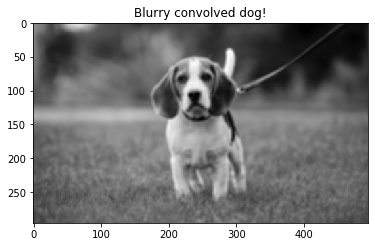

In [32]:
def convolve(image, h):
    ### YOUR SOLUTION HERE 


# You can change this to increase the blurring area
kernel_size = 5

# Normalize the filter
blur_filter = (1 / kernel_size ** 2) * np.ones((kernel_size, kernel_size))

blur_convolve_image = convolve(gray_image, blur_filter)

plt.imshow(blur_convolve_image, cmap="gray")
plt.title("Blurry convolved dog!")
plt.show()

Let's test your convolution function with some commonly used kernels! You will notice that they are almost always symmetrical, but of course we are not limited by this! Another thing you might notice is that they do not necessarily hold values of pixels within 0 to 255, so most kernels require some form of normalization or adjusting after application.

### Gaussian blur

Instead of assuming that each pixel in the receptive field is equally important, such as we have done with our earlier blurring filters, we can also create a filter that takes the distance of pixels into consideration. One such filter is the Gaussian blur filter. This filter is available in all sizes, and follows the shape of a Gaussian distribution. It creates an effeect as if you are viewing the image through a translucent screen.

$$
h=
\frac{1}{16}
\begin{bmatrix}
\ \ 1 &\ \  2 &\ \  1 \\
\ \ 2 &\ \  4 &\ \  2 \\
\ \ 1 &\ \  2 &\ \  1
\end{bmatrix}
$$

$$
h=
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}
$$

As you can see, this filter is properly normalized, and as such can not create values that do not lie in the range 0-255.

Implement a Gaussian filter and observe its effects. Do you notice a big difference with our previous blurring filter?

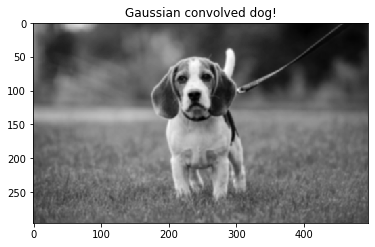

In [59]:
### YOUR SOLUTION HERE

### END SOLUTION

gauss_image = convolve(gray_image, gauss_filter)

plt.imshow(gauss_image, cmap="gray")
plt.title("Gaussian convolved dog!")
plt.show()

### Sharpening

In a sharpening filter, transitions towards a pixel are amplified. There are multiple methods to achieve this. The first one is fairly simple, and gives good results, but is a bit aggressive:

$$
h=
\begin{bmatrix}
\ \ 0 & -1 & \ \ 0 \\
-1 & \ \ 5 & -1 \\
\ \ 0 & -1 & \ \ 0
\end{bmatrix}
$$

This second one, named an "Unsharp masking"-filter, is based on a gaussian blur and is therefore slightly less sensitive to noise in the picture.

$$
h=
\frac{-1}{256}
\begin{bmatrix}
1 & 4 & \ \ 6 & 4 & 1 \\
4 & 16 & \ \ 24 & 16 & 4 \\
6 & 24 & -476 & 24 & 6 \\
4 & 16 & \ \ 24 & 16 & 4 \\
1 & 4 & \ \ 6 & 4 & 1
\end{bmatrix}
$$

Implement a sharpening filter and observe its effects. 

Notice that both filters might produce values that do not lie in the range 0-1. The easiest way to solve this is to use `np.maximum` and `np.minimum` to apply a max and min function to each of the elements of the array at once.

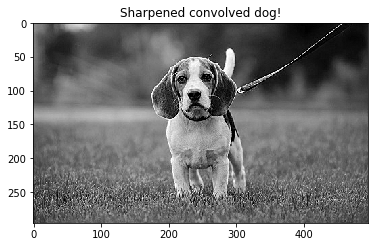

In [58]:
### YOUR SOLUTION HERE

### END SOLUTION

sharp_image = convolve(gray_image, sharp_filter)

sharp_image = np.maximum(sharp_image, 0)
sharp_image = np.minimum(sharp_image, 1)

plt.imshow(sharp_image, cmap="gray")
plt.title("Sharpened convolved dog!")
plt.show()

### Edge detection

Edge detection is an integral part of identifying objects in images and aims at identifying points at which the image brightness changes sharply. The theory is that large discontinuities in image brightness correspond to depth changes, surface orientation, material properties, illumination, etc. An example of two simple edge detection kernels is:

$$
h=
\begin{bmatrix}
1 & 0 & -1 \\
0 & 0 & 0 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
h=
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

Where the first kernel primarily reacts to edges that are diagonal, and the second kernel reacts to transitions in every direction, which makes it very sensitive to noise. To cope with this issue, most edge detection methods require you to first apply a blur to the image. 

A more complex method of finding edges in an image is the "Canny edge detector". This is in fact a multi-stage algorithm that can detect a wide range of edges in imagery and is grounded in mathematics. We will not discuss all the steps in the algorithm, but a large part of it is based on finding the so-called intensity gradients of each pixel. These gradients are calculated by using a edge detection filter that can calculate partial derivatives of the gradient in the horizontal and vertical directions. One method to get these gradients is the Sobel filter.

The Sobel filter uses two kernels with size 3 to get the gradient in the horizontal direction ($\mathbf{G}_x$) and in the vertical direction ($\mathbf{G}_y$):

$$
\mathbf{G}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} * \mathbf{A}
\quad
\mbox{and}
\quad   
\mathbf{G}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix} * \mathbf{A}
$$

These filters can be decomposed into two elements. One is a vector kernel that is based on Gaussian smoothing: $[1 \ 2 \ 1]$. While the other is a differentiation vector kernel: $[1 \ 0 \ -1]$. You can view this differentiation kernel as a simplification of the actual gradient of a point on a line. Simply take the diffence to the left and to the right of the point and we have an approximation of the actual gradient. A [more formal explanation can be found on Wikipedia](https://en.wikipedia.org/wiki/Sobel_operator#More_formally). These approximations of the partial derivatives of the gradient can be used to calculate an approximation of the _magnitude_ of the gradient $\mathbf{G}$:

$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$

This magnitude is the perfect indicator for interesting areas in the image: if the magnitude has a high value, there is some transition, and if it is zero there is none, which probably indicates do not need to look at this area of the image. 

Something that is also possible, but that we will not use here, is that we can get an approximation of the gradient _direction_ $\mathbf{\theta}$:

$$\mathbf{\Theta} = \operatorname{atan2}\left(\mathbf{G}_y, \mathbf{G}_x\right)$$

This might be interesting if you are only interested in edges going in specific directions.

Implement the two sobel filters, convolve them with the grayscale image, and finally calculate the gradients. Make sure to normalize the filters before applying them to the image.

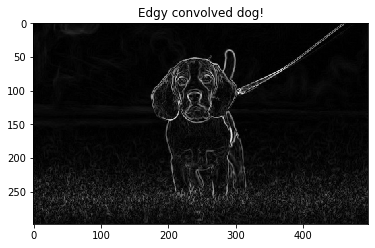

In [35]:
### YOUR SOLUTION HERE

### END SOLUTION

plt.imshow(sobel_image, cmap="gray")
plt.title("Edgy convolved dog!")
plt.show()

## Downsampling - Pooling

Earlier this notebook we referred to a second type of cells, whose output is a complex combination of all signals in its receptive field. Even though these cells were named "complex" by Kunihiko Fukushima, the equivalent operations within a Convolutional Neural Network is easy to understand and implement. Their equivalent in Convolutional Neural Networks is named a Pooling layer. These layers have the role of downsampling information, such that the amount of calculations that is required in the next set of layers is decreased. This is done by reducing the spacial size of the intermediate outputs of the layers. This not only reduces the amount of computation necessary but also protects against overfitting.

Again, the main principle of pooling is very simple. Large matrices are reduced in size to become smaller ones. One of the most commonly used pooling techniques is called **max-pooling**, wherein only the maximum value within a receptive field is kept, and the other values are discarded.

![](pooling.png)

The size of this rectangle is still called the **kernel size**, and the number of steps to where the next kernel will start is named **stride**. In the image above, an example of max-pooling is shown, where the kernel size is $(2, 2)$ and the stride is 2 as well. The input image is partitioned into a set of rectangles, and for each region the maximum value is determined. 

![](stride1.png)

The picture above shows the effect of a pooling operation with a kernel size of $(3, 3)$ and a stride of 1. A stride of 1 is not commonly used, as it does not greatly affect the size of the output.

![](stride2.png)

The picture above shows the effect of a pooling operation with a kernel size of $(3, 3)$ and a stride of 2. Increasing the stride will decrease the number of pixels in the output exponentially. Setting the stride bigger than the kernel size will result in pixels being skipped. 

**Sidenote:** Stride can also be used for convolution, but in practice it is rarely done as otherwise fine details in the image might be skipped over.

For a network, pooling provides a form of translation invariance; it does not matter if the network is activated slightly to the left, right, up, or down, as the pooling operation ensures that only the "most important" features in the receptive region are taken into acount. In other variants of pooling, you might take the average, or the minimum.

**Argue why pooling would also control overfitting.**

*YOUR ANSWER HERE*

Implement the function `max_pool` below, where`kern_size` is a tuple defining the area wherein you determine the maximum, and `stride` indicates the number of steps you take before determining a new maximum. The output dimensions of the matrix can be calculated easily:

$$ width_{output} = \frac{width_{input} - width_{kernel}}{stride}$$

$$ height_{output} = \frac{height_{input} - height_{kernel}}{stride}$$

Try to experiment with different inputs and see if they produce the correct output. Include tests that try out asymetrical kernels and smaller and bigger strides.

**Hint:** use [slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) and `np.max`! 

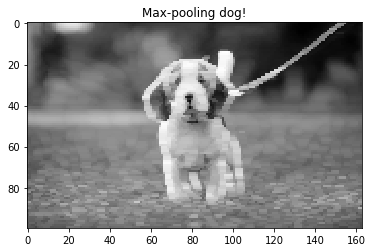

In [138]:
def max_pool(image, kern_size, stride):
    ### YOUR SOLUTION HERE


pooled_image = max_pool(gray_image, (2, 10), 3)

plt.imshow(pooled_image, cmap="gray")
plt.title("Max-pooling dog!")
plt.show()

### How does this translate to a Convolutional Neural Network?

![](CNN.png)

The main idea of CNNs is to extract features from the original input by applying convolutions with different filters. The topological overview of a typical CNN is displayed in the image above. A CNN can be separated into two phases. The first phase is the feature extraction, and the second phase is classification, where the features extracted in the extraction phase are used. 

The input in the CNN depicted above is a picture of two boats along a dock. In the feature extraction phase, convolution is applied to this image, and the output of this convolution is called a **feature map**. Now, if you look closely, you can see that there are multiple (in this case three) feature maps "stacked" on top of eachother. This is a result of the application of multiple (in this case three) different filters all convolved with the original image concurrently. Each of these feature maps will try to extract a different set of features from the original image. The resulting feature maps are all subsampled in a pooling layer, resulting in multitude (again, in this case three) smaller feature maps. This process of first applying convolution and then applying pooling can be repeated multiple times, where the idea is to increase the number of extracted features, while reducing the complexity of these features. This is often done until there are many feature maps that are only a couple of pixels in size.

In the classification phase, the resulting feature maps are **flattened**; the pixels are rearranged to form a vector. This flattened feature array is then inserted into a fully connected network, that is essentially the same as any Neural Network that you would use for classification.

## Application - MNIST Fashion


To further familiarize you with how CNNs work as opposed to "normal" NNs, we will build our own feature maps and compare results. First, lets load our data, which comes from the [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist) dataset. This dataset was made by Zalando using their own article's images and shares the same image size and structure of training and testing splits: it consists of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image, associated with a label from 10 classes:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

The code below loads the data and shows you what the data looks like.

In [150]:
# Load the required libraries for the next part of the exercise
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape)

# Image size is 28*28
image_size = x_train.shape[1] * x_train.shape[2]

print("First 5 training labels: ", y_train[:5]) 

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' )

# Show the first 20 samples
fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(x_train[i], cmap='gray')
    ax.set_title(classes[y_train[i]])

plt.show()
    
# Convert to "one-hot" vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 5 training labels:  [9 0 0 3 0]


First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Now that we have loaded the data, and have training and testing dataset ready, lets first take a look at a basic NN. We will implement this NN using [Tensorflow](https://www.tensorflow.org/), which enables us to easily generate, fit, evaluate, and analyse all types of Machine Learning models.

We'll build a simple model, using 64 nodes with sigmoidal activation on the input layer, and softmax on the output layer. 

In [76]:
def build_neural_net(input_size, num_classes):
    # Create a sequential model object
    model = models.Sequential()

    # Create the input layer
    model.add(layers.Dense(units=64, activation='sigmoid', input_shape=(input_size,)))
    
    # You can try to add hidden layers here later!
    
    # Create the output layer with the appropriate amount of outputs and softmax activation
    model.add(layers.Dense(units=num_classes, activation='softmax'))
    
    # Compile the network with an appropriate loss function
    # Also makes sure that the model will keep track of accuracy
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

Now we can easily fit and evaluate the model! Notice some keywords that are used here:

- **Epoch:** An epoch indicates the number of passes of the entire training dataset the machine learning algorithm has completed. 10 epochs means that we train the dataset on 
- **Batch size:** Datasets are usually grouped into batches when training. The idea is that we do not do backpropagate our error for every single output, but we calculate the average error over a large set of inputs. This speeds up the process greatly, as we reduce the number of calculations.
- **Validation split:** In this case, the data is split into 90% training data, and 10% validation data. This way, we can evaluate the metrics of our model *during* training, while not accidentally "contaminating" the model with our testing data.
- **Flatten:** the pixels are rearranged to form a vector/array. This means that we lose the spatial relation between pixels, but we can now use it as input for the fully connected network.

You can even run the `fit` method multiple times to get better results! Keep in mind however that this will also result in a `history` object that only holds the accuracy and loss for the last run of `fit`.

In [77]:
model = build_neural_net(image_size, num_classes)

# Flat
x_train_flat = x_train.reshape(x_train.shape[0], image_size)
x_test_flat = x_test.reshape(x_test.shape[0], image_size)

# Train our model
history = model.fit(x_train_flat, y_train, epochs=10, batch_size=128, validation_split=.1)

# See how it scored!
loss, accuracy  = model.evaluate(x_test_flat, y_test)

# Print to 3 decimals
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9185 - accuracy: 0.6982 - val_loss: 0.6521 - val_accuracy: 0.7555
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.6248 - accuracy: 0.7738 - val_loss: 0.5673 - val_accuracy: 0.7927
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5787 - accuracy: 0.7871 - val_loss: 0.5482 - val_accuracy: 0.8062
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5582 - accuracy: 0.7968 - val_loss: 0.5355 - val_accuracy: 0.8030
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5299 - accuracy: 0.8081 - val_loss: 0.5234 - val_accuracy: 0.8075
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5180 - accuracy: 0.8128 - val_loss: 0.5264 - val_accuracy: 0.8050
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.8146 - val_loss: 0.5194 - val_accuracy: 0.8163
Epoch 

Finally, we can see how our model fared during training by calling the `history.history` dictionary.

In [30]:
print(history.history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training', 'validation'], loc='best')

plt.show()

{'loss': [0.9640182256698608, 0.6412308216094971, 0.574054479598999, 0.5544462203979492, 0.5448901653289795, 0.5312861800193787, 0.5200510025024414, 0.5149034857749939, 0.5037357211112976, 0.5001010298728943], 'accuracy': [0.6969814896583557, 0.7665370106697083, 0.7917407155036926, 0.7992777824401855, 0.8030370473861694, 0.8103703856468201, 0.8138889074325562, 0.8166481256484985, 0.8206296563148499, 0.8208518624305725], 'val_loss': [0.6827564835548401, 0.5987702012062073, 0.5604405403137207, 0.5367044806480408, 0.5527692437171936, 0.5262680053710938, 0.5416795015335083, 0.5086080431938171, 0.4985848069190979, 0.5331404209136963], 'val_accuracy': [0.7556666731834412, 0.7925000190734863, 0.796833336353302, 0.8075000047683716, 0.7975000143051147, 0.8081666827201843, 0.79666668176651, 0.815833330154419, 0.8213333487510681, 0.8048333525657654]}


It is even possible to take a better look at the (mis)predictions that the model has made and display them in a confusion matrix. Previously, we have only worked with confusion matrices that displayed their results as text. In the code below we have included an example of how you would display it in a graph.


In [144]:
from tensorflow.math import confusion_matrix
import tensorflow as tf
import seaborn as sns

y_true = tf.argmax(y_test, axis=1)
y_pred = tf.argmax(model(x_test_flat), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred, num_classes=num_classes)

sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes)
plt.show()
print(conf_matrix)

tf.Tensor(
[[793   2   7  58   7   0 114   0  18   1]
 [  8 934  14  30   7   0   4   0   3   0]
 [ 17   2 596  12 201   0 169   0   3   0]
 [ 41  11   7 846  32   0  60   0   3   0]
 [  0   1  87  49 595   0 263   0   5   0]
 [  1   0   0   1   0 877   0  47   7  67]
 [191   4 101  35  78   0 570   0  21   0]
 [  0   0   0   0   0  29   0 901   0  70]
 [  2   1   7   4   5   5  39   4 932   1]
 [  0   0   1   1   0   6   0  51   1 940]], shape=(10, 10), dtype=int32)


**Which classes does the model find difficult to predict?**

_Your answer here_

**Which classes does the model "confuse" with other classes? Why do you think this is the case?**

_Your answer here_

## DIY CNN

To demonstrate that we can extract more information from the image before flattening it and inserting it into our fully connected network, we will manually create a series of feature maps. To make it a fair comparison with the network above, we will use the exact same settings when creating the fully connected network in which these feature maps will be inserted. Essentially, we are adding the feature extraction phase.

First, we will apply four different filters to each of the images. These four filters will produce four feature maps for every image, each of the exact same size as the image. Entering these four feature maps directly into our fully connected network would be unfair, as the number of input parameters would then be four times as large. However, we can, as a second step, decrease this size by applying pooling. To decrease the size by a factor of four, we can use a kernel size of $(2, 2)$ and a stride of 2. After doing this, we can stitch these four feature maps together and flatten them, resulting in a input vector of the exact same size as the original image. 

Implement the function `create_fmaps` that accepts a list of four `filters`, and applies these filters to every image within the `data`. We've already included an array `fmaps` of the correct size. For each filter in `filters`, you should convolve the filter with every image in the dataset, and store the solution in `fmaps`. Use the function we named [`fast_convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) to apply your convolutions. This function by Scipy is highly optimized and probably runs a lot faster than our implementation of convolution (in our testing, this function was almost 20 times as fast!). Keep in mind that it still might take a couple of minutes to run. Make sure to pass the function `mode="same"` to make sure that input and output is the same size.

**Note:** You are allowed to choose different filters, but make sure that there are always four filters.

In [111]:
from scipy.signal import convolve as fast_convolve

filters = [sharp_filter, x_sobel_filter, y_sobel_filter, gauss_filter]

def create_fmaps(filters, data):
    fmaps = np.zeros((4, data.shape[0], data.shape[1], data.shape[2]))
    
    ### YOUR SOLUTION HERE
    
    return fmaps

fmaps_train = create_fmaps(filters, x_train)
fmaps_test = create_fmaps(filters, x_test)

As a second step, implement the function `pool_fmaps`, that applies max pooling to each `fmap`. This function should be almost the exact same as the previous function you wrote; first, loop over each feature map in `fmaps`, then for every image in this feature map, apply max pooling. To aid with optimization, use the function [`fast_pool`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.block_reduce) to apply max pooling. This function assumes a stride that set such that the kernels do not overlap, so the three arguments you should give to this function are: the image, the kernel size, and the function to be applied to each of the kernels, which is `np.max` in our case.

In [112]:
from skimage.measure import block_reduce as fast_pool

def pool_fmaps(fmaps):
    # We create feature maps that are 4 times as small, so each dimension of the image should be 2 times as small
    fmaps_small = np.zeros((fmaps.shape[0], fmaps.shape[1], fmaps.shape[2]//2, fmaps.shape[3]//2))

    ### YOUR SOLUTION HERE
 
    return fmaps_small
    
fmaps_train_small = pool_fmaps(fmaps_train)
fmaps_test_small = pool_fmaps(fmaps_test)

Now, as a final step, we flatten these four feature maps and stitch them together, resulting in a series of input vectors of the exact same size as the original images. Inserting these into a NN that is equivalent to the one we have used previously, will hopefully yield better results!

In [113]:
model2 = build_neural_net(image_size, num_classes)

# Reshape to vectors, but keep the feature maps separated
fmaps_train_flat = fmaps_train_small.reshape((4, x_train.shape[0], image_size//4))
fmaps_test_flat = fmaps_test_small.reshape((4, x_test.shape[0], image_size//4))

# Recombine the feature maps into one big feature map
fmaps_train_flat = np.concatenate(fmaps_train_flat, axis=1)
fmaps_test_flat = np.concatenate(fmaps_test_flat, axis=1)

# Train our model
history2 = model2.fit(fmaps_train_flat, y_train, epochs=10, batch_size=128, validation_split=.1)

# See how it scored!
loss2, accuracy2  = model2.evaluate(fmaps_test_flat, y_test)

# Print to 3 decimals
print(f'Test loss: {loss2:.3}')
print(f'Test accuracy: {accuracy2:.3}')

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8618 - accuracy: 0.7246 - val_loss: 0.5971 - val_accuracy: 0.7858
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5668 - accuracy: 0.7944 - val_loss: 0.5305 - val_accuracy: 0.8118
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.8126 - val_loss: 0.5256 - val_accuracy: 0.8102
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5009 - accuracy: 0.8197 - val_loss: 0.5001 - val_accuracy: 0.8213
Epoch 5/10
422/422 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.8260 - val_loss: 0.4841 - val_accuracy: 0.8295
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4753 - accuracy: 0.8287 - val_loss: 0.4935 - val_accuracy: 0.8128
Epoch 7/10
422/422 [==============================] - 1s 4ms/step - loss: 0.4615 - accuracy: 0.8357 - val_loss: 0.4838 - val_accuracy: 0.8213
Epoch 

Comparing them in a plot, we can see that the DIY CNN performs better than our original NN!

In [34]:
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')

plt.legend(['Normal NN', 'DIY CNN'], loc='best')

plt.show()

## Using `TensorFlow`'s CNN

The next step for us is to not use our pre-defined filters, but to use `TensorFlow`'s [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) that enables us to learn the most optimal filter. In the function below, implement a model using [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), and [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten). Make sure that the model is identical to the DIY CNN we built above: it should have a convolutional layer with 4 filters of size (3, 3), an input shape of (28, 28, 1), a max pooling layer, a flattening layer, and then the same dense layers as the original model. 

In [115]:
def build_conv_net(image_size, num_classes):
    # YOUR SOLUTION HERE

    return model

# Get our number of samples
train_samples = x_train.shape[0]
test_samples = x_test.shape[0]

# Assume the image is square
image_size = x_train.shape[1]

x_train_conv = np.reshape(x_train, (train_samples, image_size, image_size, 1))
x_test_conv = np.reshape(x_test, (test_samples, image_size, image_size, 1))

model3 = build_conv_net(image_size, num_classes)

# Train our model
history3 = model3.fit(x_train_conv, y_train, epochs=10, batch_size=128, validation_split=.1)

# See how it scored!
loss3, accuracy3  = model3.evaluate(x_test_conv, y_test)

# Print to 3 decimals
print(f'Test loss: {loss3:.3}')
print(f'Test accuracy: {accuracy3:.3}')

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8149 - accuracy: 0.7408 - val_loss: 0.5549 - val_accuracy: 0.8067
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5132 - accuracy: 0.8170 - val_loss: 0.4746 - val_accuracy: 0.8265
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4436 - accuracy: 0.8410 - val_loss: 0.4309 - val_accuracy: 0.8443
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4127 - accuracy: 0.8521 - val_loss: 0.4109 - val_accuracy: 0.8512
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3952 - accuracy: 0.8601 - val_loss: 0.4007 - val_accuracy: 0.8540
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3805 - accuracy: 0.8644 - val_loss: 0.3829 - val_accuracy: 0.8628
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3714 - accuracy: 0.8675 - val_loss: 0.3791 - val_accuracy: 0.8593
Epoch 

Comparing in a plot again, we can see that this model performs even better due to the flexibility in the learning of the filters! 

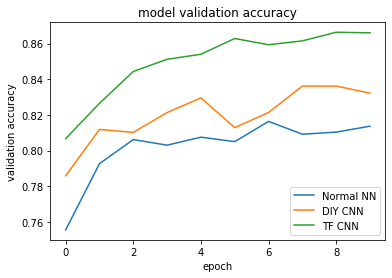

In [116]:
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')

plt.legend(['Normal NN', 'DIY CNN', 'TF CNN'], loc='best')

plt.show()